In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [69]:
data_path1=r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covid_confirmed_raw=pd.read_csv(data_path1)

data_path=r"https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination_raw=pd.read_csv(data_path)

In [70]:
country_list=['France',
              'Germany',
              'Italy',
             ] 

Text(0.5, 0, 'Date')

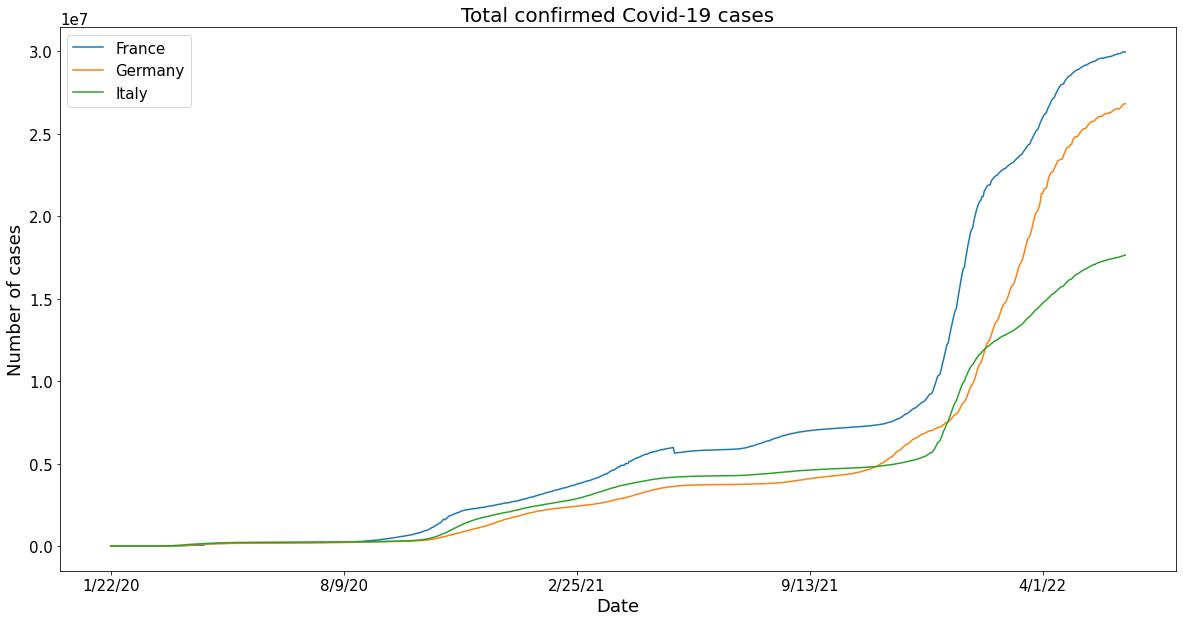

In [71]:
time_idx=covid_confirmed_raw.columns[4:]
df_plot = pd.DataFrame({'date':time_idx})
for each in country_list:
    df_plot[each]=np.array(covid_confirmed_raw[covid_confirmed_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
    
df_plot.set_index('date').plot(figsize=(20,10))
plt.rcParams.update({'font.size': 15})
plt.title('Total confirmed Covid-19 cases', {'fontsize':20})
plt.ylabel("Number of cases", {'fontsize':18})
plt.xlabel("Date", {'fontsize':18})

Text(0.5, 0, 'Timeline')

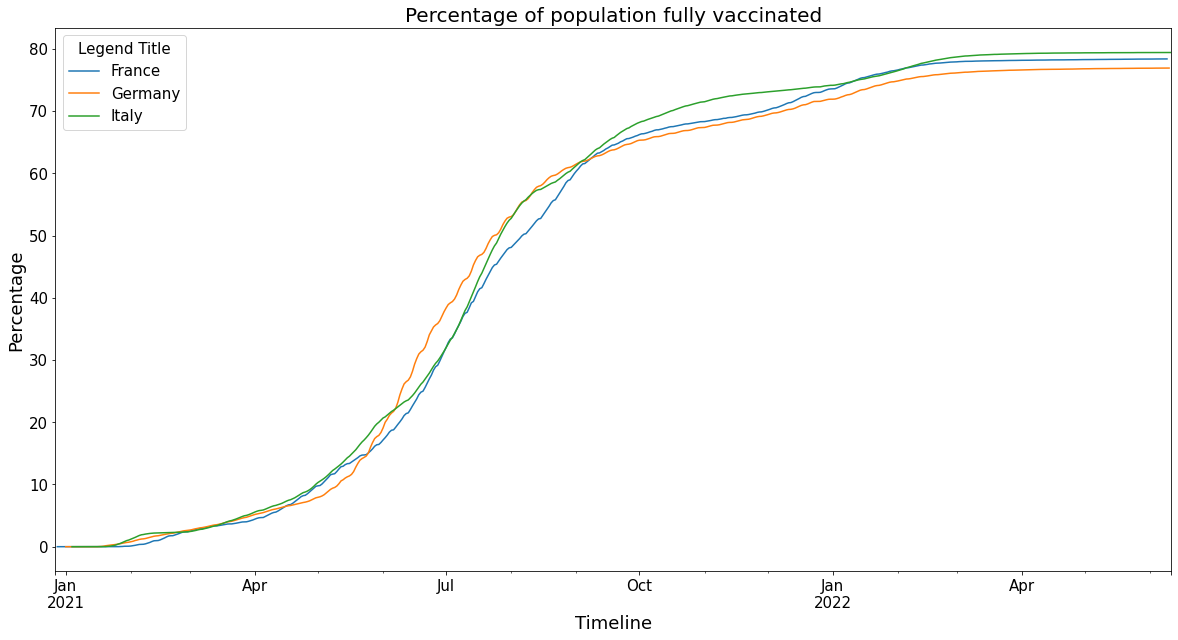

In [72]:
for each in country_list:
    date1 = pd.to_datetime(vaccination_raw[vaccination_raw['location']==each]['date'])
    vaccination_raw[vaccination_raw['location']==each].set_index(date1).people_fully_vaccinated_per_hundred.plot(figsize=(20,10))

plt.legend(country_list, title='Legend Title')
plt.rcParams.update({'font.size': 15})
plt.title("Percentage of population fully vaccinated", {'fontsize':20})
plt.ylabel("Percentage", {'fontsize':18})
plt.xlabel("Timeline", {'fontsize':18})